In [2]:
import sys
from pathlib import Path

ROOT = Path.cwd().resolve()
SRC = ROOT / "src"

if SRC.exists():
    sys.path.append(str(SRC))
else:
    # If notebook is inside /notebooks, go one level up
    sys.path.append(str(ROOT.parent / "src"))

In [ ]:
# Setup

import pandas as pd
from pathlib import Path

from horizon_forecast.ingestion.adm_load import load_admissions
from horizon_forecast.ingestion.bedinv_load import load_bed_inventory
from horizon_forecast.ingestion.edarr_load import load_ed_arrivals
from horizon_forecast.ingestion.electsurgeries_load import load_elective_surgeries
from horizon_forecast.ingestion.staff_load import load_staffing

from horizon_forecast.forecasting.eda.eda_core import (
    eda_admissions_over_time,
    eda_admissions_by_type,
    eda_length_of_stay,
    eda_admissions_seasonality,
    eda_bed_inventory,
    eda_ed_arrivals_over_time,
    eda_elective_surgeries,
    eda_staffing_levels
)

In [4]:
# Load all datasets
adm = load_admissions()
bed = load_bed_inventory()
ed = load_ed_arrivals()
elec = load_elective_surgeries()
staff = load_staffing()

In [7]:
adm["admission_datetime"] = pd.to_datetime(adm["admission_datetime"])

In [9]:
# Run EDA functions
eda_admissions_over_time(adm)
eda_admissions_by_type(adm)
eda_length_of_stay(adm)
eda_admissions_seasonality(adm)

eda_bed_inventory(bed)

eda_ed_arrivals_over_time(ed)

eda_elective_surgeries(elec)

eda_staffing_levels(staff)

[EDA] Saved: reports\figures\admissions_over_time_D.png
[EDA] Saved: reports\figures\admissions_by_type.png
[EDA] Saved: reports\figures\length_of_stay_distribution.png
[EDA] Saved: reports\figures\admissions_seasonality.png
[EDA] Saved: reports\figures\bed_inventory_by_ward.png
[EDA] Saved: reports\figures\ed_arrivals_over_time_D.png
[EDA] Saved: reports\figures\elective_surgeries_over_time.png
[EDA] Saved: reports\figures\staffing_by_ward.png


<Axes: xlabel='admission_datetime'>

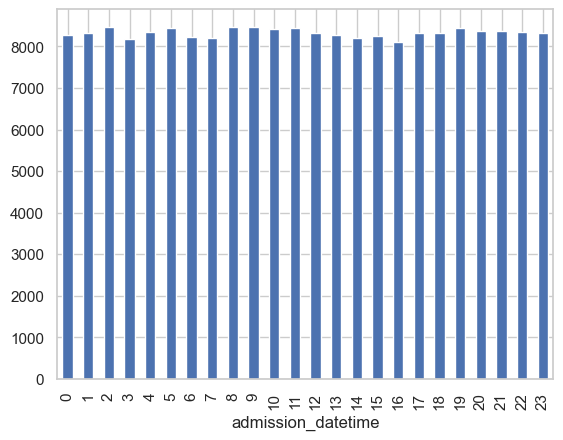

In [10]:
adm["admission_datetime"].dt.hour.value_counts().sort_index().plot(kind="bar")